<a href="https://www.kaggle.com/code/jeyashree94/car-price-prediction?scriptVersionId=135624845" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(df.shape)

(301, 9)


In [4]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [6]:
import datetime

In [7]:
date_time = datetime.datetime.now()

In [8]:
year = date_time.year

In [9]:
age = year - df['Year']

In [10]:
df.insert(0 , "Age" , age)

In [11]:
print(df.head())

   Age Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0    9     ritz  2014           3.35           5.59       27000    Petrol   
1   10      sx4  2013           4.75           9.54       43000    Diesel   
2    6     ciaz  2017           7.25           9.85        6900    Petrol   
3   12  wagon r  2011           2.85           4.15        5200    Petrol   
4    9    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [12]:
df.drop("Year" , axis=1 , inplace=True)

In [13]:
df

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,8,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,14,city,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,6,city,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0 ,'Diesel':1 , 'CNG':2 })
df

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,0,Dealer,Manual,0
1,10,sx4,4.75,9.54,43000,1,Dealer,Manual,0
2,6,ciaz,7.25,9.85,6900,0,Dealer,Manual,0
3,12,wagon r,2.85,4.15,5200,0,Dealer,Manual,0
4,9,swift,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,1,Dealer,Manual,0
297,8,brio,4.00,5.90,60000,0,Dealer,Manual,0
298,14,city,3.35,11.00,87934,0,Dealer,Manual,0
299,6,city,11.50,12.50,9000,1,Dealer,Manual,0


In [16]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [17]:
df['Seller_Type'] = df['Seller_Type'].map({'Dealer' :0 , 'Individual':1})
df

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,0,0,Manual,0
1,10,sx4,4.75,9.54,43000,1,0,Manual,0
2,6,ciaz,7.25,9.85,6900,0,0,Manual,0
3,12,wagon r,2.85,4.15,5200,0,0,Manual,0
4,9,swift,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,1,0,Manual,0
297,8,brio,4.00,5.90,60000,0,0,Manual,0
298,14,city,3.35,11.00,87934,0,0,Manual,0
299,6,city,11.50,12.50,9000,1,0,Manual,0


In [18]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
df['Transmission'] = df['Transmission'].map({'Manual':0 ,'Automatic':1 })
df

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,0,0,0,0
1,10,sx4,4.75,9.54,43000,1,0,0,0
2,6,ciaz,7.25,9.85,6900,0,0,0,0
3,12,wagon r,2.85,4.15,5200,0,0,0,0
4,9,swift,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,1,0,0,0
297,8,brio,4.00,5.90,60000,0,0,0,0
298,14,city,3.35,11.00,87934,0,0,0,0
299,6,city,11.50,12.50,9000,1,0,0,0


In [20]:
import seaborn as sns

<Axes: >

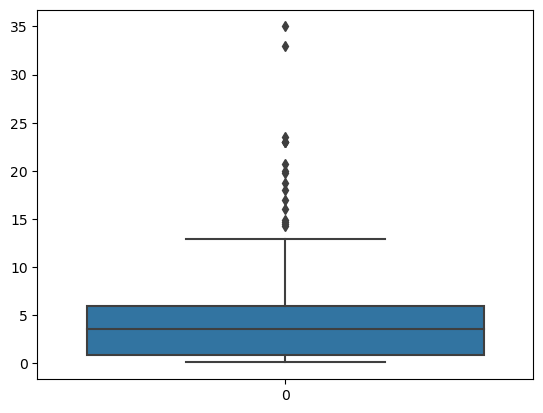

In [21]:
sns.boxplot(df['Selling_Price'])

In [22]:
sorted(df['Selling_Price'] , reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [23]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Age,1.000000,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,-0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_20/2649783242.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot= True)


<Axes: >

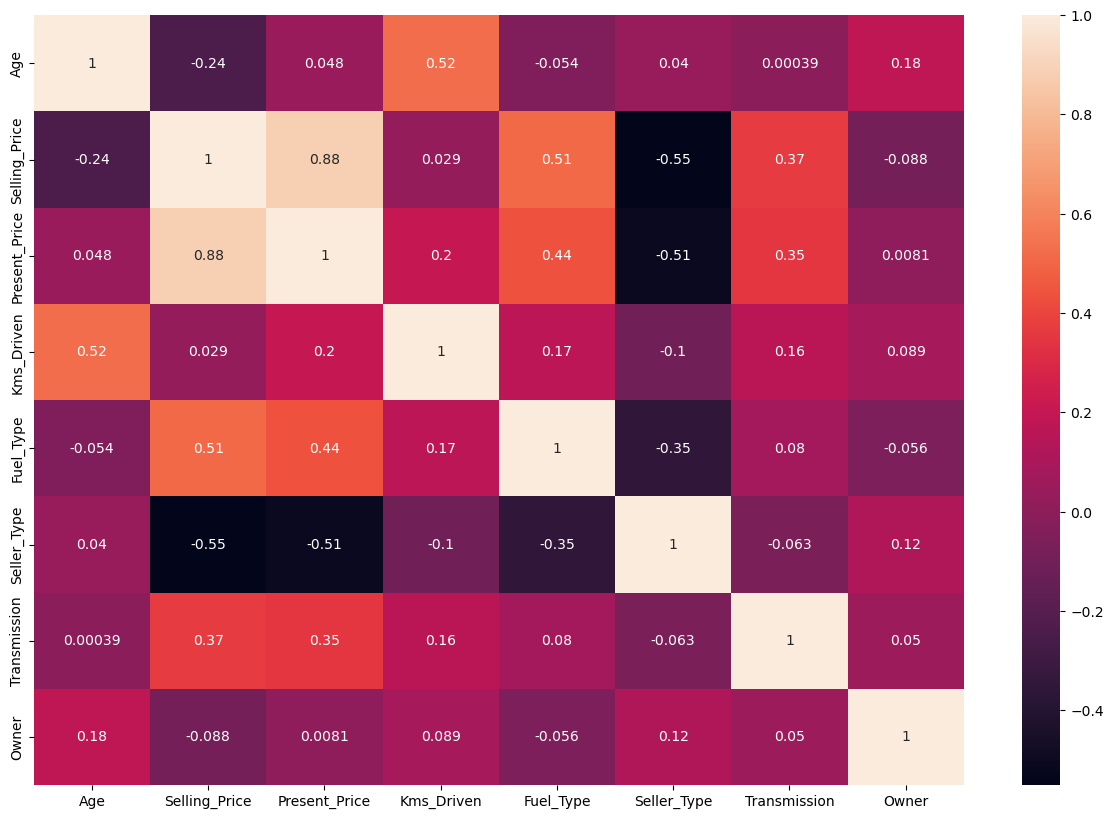

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , annot= True)

In [26]:
df


,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,ritz,3.35,5.59,27000,0,0,0,0
1,10,sx4,4.75,9.54,43000,1,0,0,0
2,6,ciaz,7.25,9.85,6900,0,0,0,0
3,12,wagon r,2.85,4.15,5200,0,0,0,0
4,9,swift,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,7,city,9.50,11.60,33988,1,0,0,0
297,8,brio,4.00,5.90,60000,0,0,0,0
298,14,city,3.35,11.00,87934,0,0,0,0
299,6,city,11.50,12.50,9000,1,0,0,0


In [27]:
X = df.drop(['Selling_Price' ,'Car_Name'] , axis =1 )
y = df['Selling_Price']

In [28]:
X

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,5.59,27000,0,0,0,0
1,10,9.54,43000,1,0,0,0
2,6,9.85,6900,0,0,0,0
3,12,4.15,5200,0,0,0,0
4,9,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,7,11.60,33988,1,0,0,0
297,8,5.90,60000,0,0,0,0
298,14,11.00,87934,0,0,0,0
299,6,12.50,9000,1,0,0,0


In [29]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)
#X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [32]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [33]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [34]:
xgb = XGBRFRegressor()
xgb.fit(X_train , y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [35]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train , y_train)

GradientBoostingRegressor()

In [36]:
lr_pred = lr.predict(X_test)
rfr_pred = rfr.predict(X_test)
xgb_pred = xgb.predict(X_test)
gbr_pred = gbr.predict(X_test)

In [37]:
lr_acc = r2_score(y_test , lr_pred)
rfr_acc= r2_score(y_test , rfr_pred)
xgb_acc = r2_score(y_test , xgb_pred)
gbr_acc = r2_score(y_test , gbr_pred)


In [38]:
print(lr_acc*100)
print(rfr_acc*100)
print(xgb_acc*100)
print(gbr_acc*100)

84.68053957654178
95.65482730224355
96.80972906606874
97.14144373288553


In [39]:
final_data = pd.DataFrame({"Model": ["LR" , "RFR" , "XGB" , "GBR"],
                          "SCORE" : [lr_acc , rfr_acc , xgb_acc , gbr_acc]})

In [40]:
final_data



,Model,SCORE
0,LR,0.846805
1,RFR,0.956548
2,XGB,0.968097
3,GBR,0.971414


<Axes: xlabel='Model', ylabel='SCORE'>

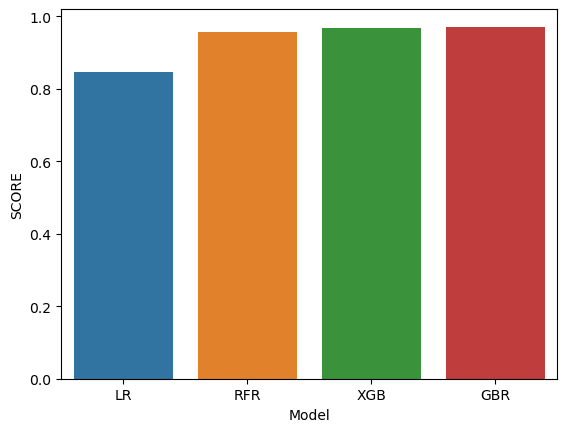

In [41]:
sns.barplot(data = final_data, x="Model", y="SCORE")

In [42]:
import pickle

In [43]:
gbr_final = GradientBoostingRegressor()


In [44]:
gbr_final.fit(X,y)

GradientBoostingRegressor()

In [45]:
import pickle
pickle.dump(gbr_final, open('model.pkl', 'wb'))